

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.                  
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.  
● ‘Neighborhood’ indicates the
location of the hospital.  
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.  
● ‘No_show’ it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.  




### Question(s) for Analysis 
 1-what is the overall appointment show-up vs. no show-up rate?
 
 2-What is the relationship between the following factors and no-shows?
  
  > A-Diseases               
    B-Scholarship                                                            
    C-Gender         
    D-SMS_receiving      
    E-Age
    F-Neighborhood
    

In [1]:
#import statements for all of the packages that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> Checking for cleanliness, and then trim and clean the dataset for analysis.


### General Properties


In [3]:
# Loading our data and print out a few lines. 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv', sep=';')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Summary:

In [4]:
#number of raws and columns
df.shape

(110527, 14)

>● Number of Patient (raws) = 110527.  
● Number of characteristics (columns) = 14.

###### Performing operations to inspect data types and look for instances of missing or possibly errant data:

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>● Here are some initial observations:
1-There are 13 independent variables and one dependent (no_show) in the dataset. 
2-The dataset does not contain any missing values (NaNs).
3-The patient_id data type is float but should be int.
4-The scheduled_day and appointment_day columns type should be changed to datetime.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>● Mean of Age is 37.  
● Maximum Age is 115 year.  
● Minimum Age is -1 year, which is a mistake in age of one patient.  




In [7]:
#Number of Duplicated
sum(df.duplicated())

0

> No Duplicated.

In [8]:
#Checking for null values
pd.isna(df).sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>There are no null value.

### Data Cleaning

Fixing Name in data columns

In [9]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We fix any age has minus values because it's not make sense.

In [10]:
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


It seems that the value has just been recorded incorrectly. We can therefore delete that row.

In [11]:
df.drop([99832], inplace=True)

We can drop 'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay' as we won't them in our Analysis.

In [12]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay' ], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


lets convert columns to boolean.

In [13]:
bool_columns=['Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show' ]

# Value inspection of the columns. Iterating through the concerning columns.
for column in df[bool_columns]:
    print(df[column].value_counts())
    print('\n')

0    99665
1    10861
Name: Scholarship, dtype: int64


0    88725
1    21801
Name: Hypertension, dtype: int64


0    102583
1      7943
Name: Diabetes, dtype: int64


0    107166
1      3360
Name: Alcoholism, dtype: int64


0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64


0    75044
1    35482
Name: SMS_received, dtype: int64


No     88207
Yes    22319
Name: No_show, dtype: int64




All values of the columns are dichotomous, except those from columns 'Handicap' and 'No_show'. This means, before converting to boolean the column names 'Handicap' and 'No_Show' need to be removed from the list.

In [14]:
bool_columns.remove('Handicap')
bool_columns.remove('No_show')
print(bool_columns)

['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']


In [15]:
for column in df[bool_columns]:
    #Conversion to boolean, by iterating through concerning colums.
    df[column] = df[column].astype('bool')
    
    #Check conversion took place corretly?
    print(df[column].value_counts())
    print('\n')

False    99665
True     10861
Name: Scholarship, dtype: int64


False    88725
True     21801
Name: Hypertension, dtype: int64


False    102583
True       7943
Name: Diabetes, dtype: int64


False    107166
True       3360
Name: Alcoholism, dtype: int64


False    75044
True     35482
Name: SMS_received, dtype: int64




Convert Handicap to boolean,but first we combine the 1,2,3,4 degrees in to 1 only in Handicap-combined.

In [16]:
df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [17]:
df['Handicap-combined'] = df['Handicap'].astype('bool')
df['Handicap-combined'].value_counts()

False    108285
True       2241
Name: Handicap-combined, dtype: int64

lets check whether the new column is included in the dataframe

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender               110526 non-null object
Age                  110526 non-null int64
Neighbourhood        110526 non-null object
Scholarship          110526 non-null bool
Hypertension         110526 non-null bool
Diabetes             110526 non-null bool
Alcoholism           110526 non-null bool
Handicap             110526 non-null int64
SMS_received         110526 non-null bool
No_show              110526 non-null object
Handicap-combined    110526 non-null bool
dtypes: bool(6), int64(2), object(3)
memory usage: 5.7+ MB


The new column Handicap-combined has successfully been included.

In [19]:
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [20]:
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [21]:
df['No_show'] = df['No_show'].astype('bool')

df['No_show'].value_counts()

False    88207
True     22319
Name: No_show, dtype: int64

In [22]:
showed = df['No_show'] == False
not_showed = df['No_show'] == True
df['showed'] = showed
df['not_showed'] = not_showed
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Handicap-combined,showed,not_showed
0,F,62,JARDIM DA PENHA,False,True,False,False,0,False,False,False,True,False
1,M,56,JARDIM DA PENHA,False,False,False,False,0,False,False,False,True,False
2,F,62,MATA DA PRAIA,False,False,False,False,0,False,False,False,True,False
3,F,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,False,True,False
4,F,56,JARDIM DA PENHA,False,True,True,False,0,False,False,False,True,False


#### Now that we have finished the cleaning work.

# <a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1: What is the overall appointment show-up vs. no show-up rate?

###### By making a pie chart to have the percentage of who showed up and who is not

20.193438647919944


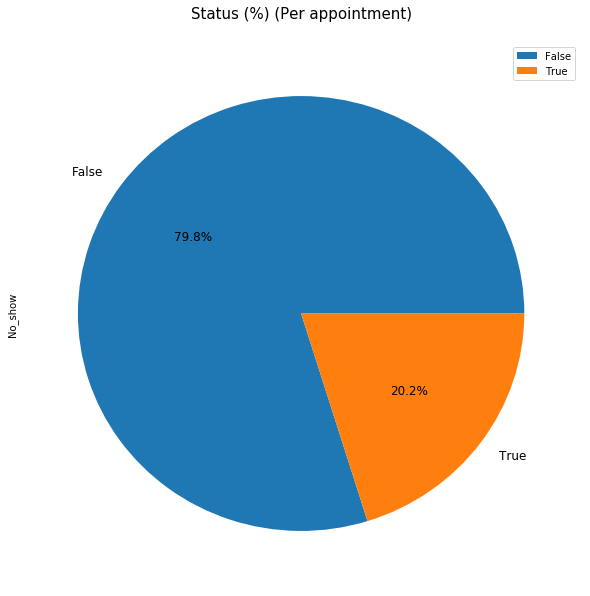

In [23]:
# making a pie chart to have the percentage of who showed up and who is not
allP = df['No_show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

• Just over 20% of all appointments resulted in no shows. The research questions will attempt to answer if the demographics of these populations are the same. They will also try to answer if this proportion is consistant given serveral priori.



### Research Question 2:What is the relationship between the following factors and no-shows?
  > A-Diseases               
    B-Scholarship                                                            
    C-Gender         
    D-SMS_receiving      
    E-Age
    F-Neighborhood  


###### This Research Question will confirm if that several variables were correlated with No Shows or not ?

In [24]:
df[showed].count()

Gender               88207
Age                  88207
Neighbourhood        88207
Scholarship          88207
Hypertension         88207
Diabetes             88207
Alcoholism           88207
Handicap             88207
SMS_received         88207
No_show              88207
Handicap-combined    88207
showed               88207
not_showed           88207
dtype: int64

In [25]:
df[not_showed].count()

Gender               22319
Age                  22319
Neighbourhood        22319
Scholarship          22319
Hypertension         22319
Diabetes             22319
Alcoholism           22319
Handicap             22319
SMS_received         22319
No_show              22319
Handicap-combined    22319
showed               22319
not_showed           22319
dtype: int64

###### First, let's look at All variables:

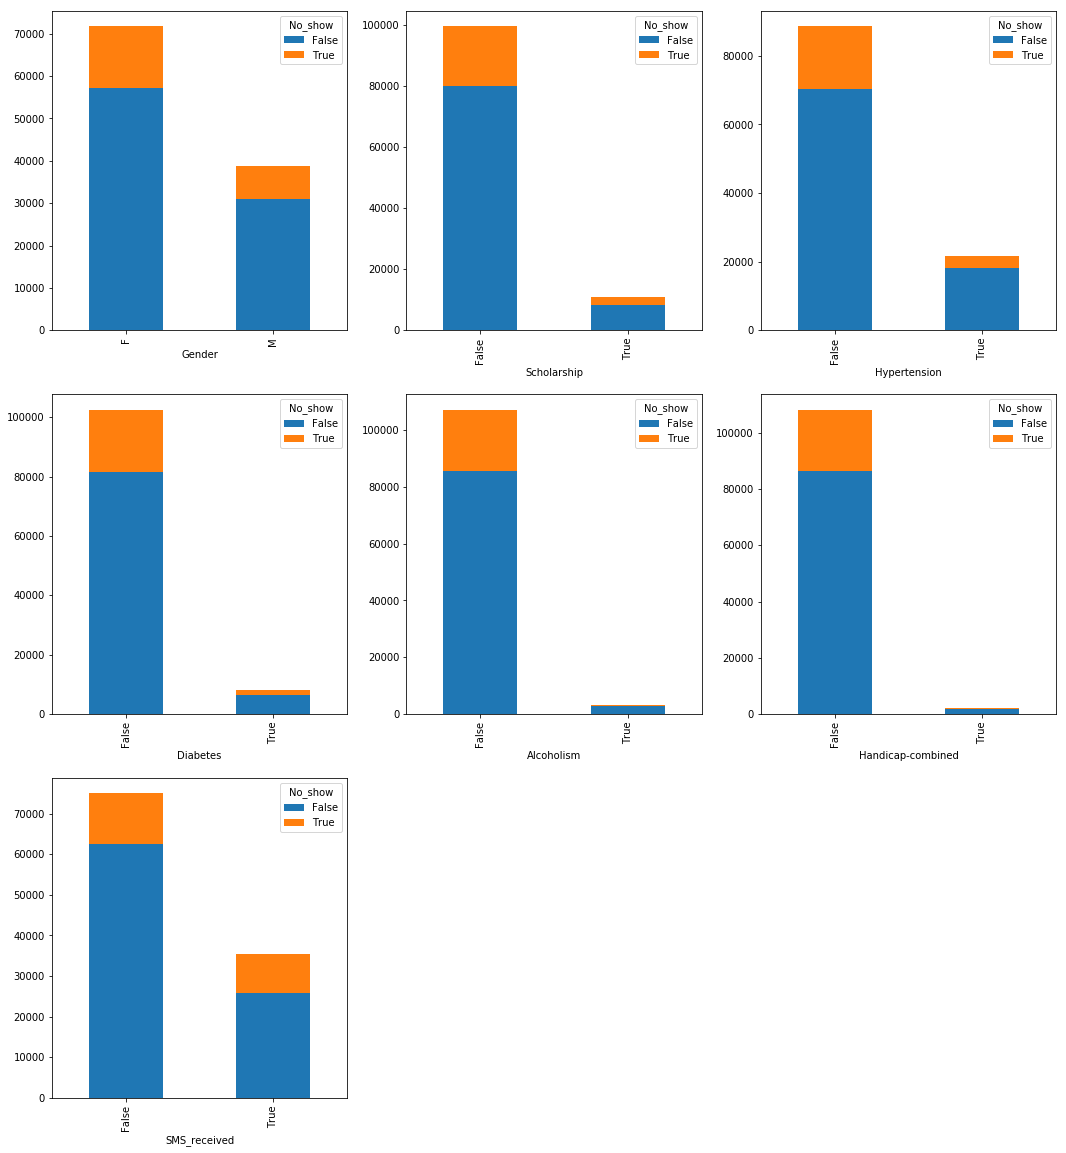

In [26]:
All_Variables = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap-combined', 'SMS_received']

fig = plt.figure(figsize=(18, 20))
for i, var in enumerate(All_Variables):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True)

• For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics.

##### completing the visualiztion to see what is the feature that affect patients to come:

In [27]:
def myplot(df, count_col):
    print(df.groupby(count_col)['showed','not_showed'].mean())
    df.groupby([count_col])['showed','not_showed'].mean().plot(kind='bar',figsize=(10,8), edgecolor='black');
    plt.xlabel(count_col, fontsize=10, weight="bold")
    plt.ylabel("Percentage of Patients Number".title(), fontsize=10, weight="bold")
    plt.title(f"Proportion Between {count_col} and Patients who No_Show".title(), fontsize=14, weight="bold")
    plt.legend(title ="showed/not_showed")
    


##### A- Analysis per Disease              

###### Hypertension:

                showed  not_showed
Hypertension                      
False         0.790961    0.209039
True          0.826980    0.173020


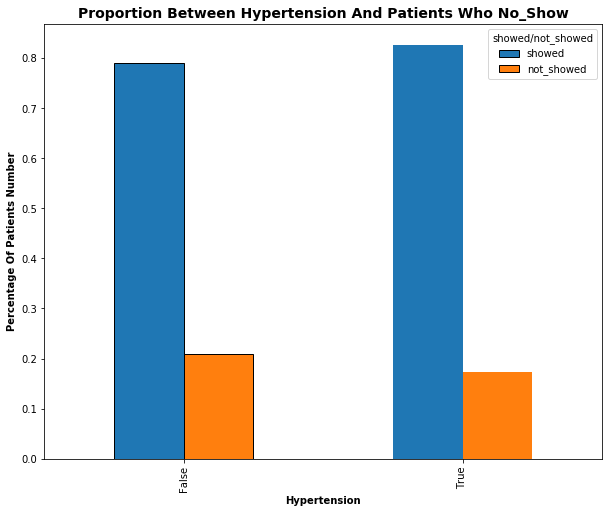

In [28]:
myplot(df,"Hypertension")

• Hypertension is insignificant.

###### Diabetes:

            showed  not_showed
Diabetes                      
False     0.796370    0.203630
True      0.819967    0.180033


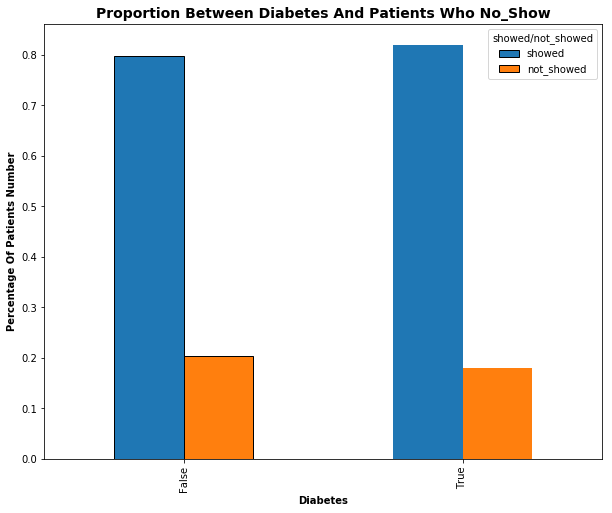

In [29]:
myplot(df,"Diabetes")


In general, 18% of diabetes did not show up, which is about 2% lower from the general average of not showing up. It seems that diabetes are more careful about their health and take medial appointments more seriously then non diabetes.

###### Alcoholism:

              showed  not_showed
Alcoholism                      
False       0.798052    0.201948
True        0.798512    0.201488


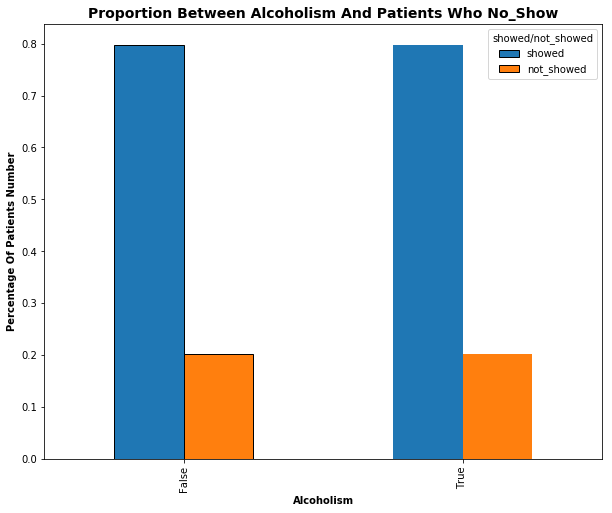

In [30]:
myplot(df,"Alcoholism")

• Alcoholism is insignificant.

###### Handicap:

                     showed  not_showed
Handicap-combined                      
False              0.797645    0.202355
True               0.818385    0.181615


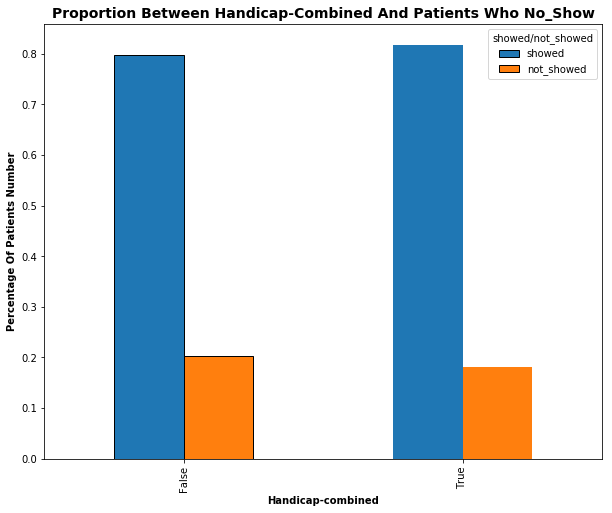

In [31]:
myplot(df,"Handicap-combined")

• All diseases show very similar Show and No-show proportions, the type of the disease does not appear to have a relationship with the no-show proportions.





##### B- Analysis per Scholarship

               showed  not_showed
Scholarship                      
False        0.801926    0.198074
True         0.762637    0.237363


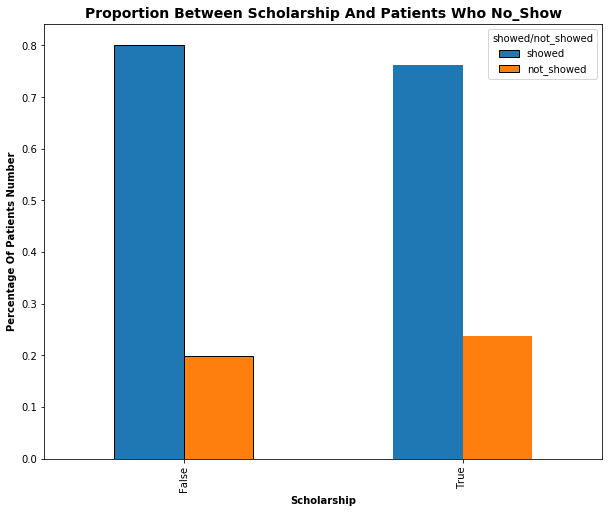

In [32]:
myplot(df,"Scholarship")

• Being enrolled in "Brasilian welfare program Bolsa Família" is insignificant

##### C- Analysis per Gender

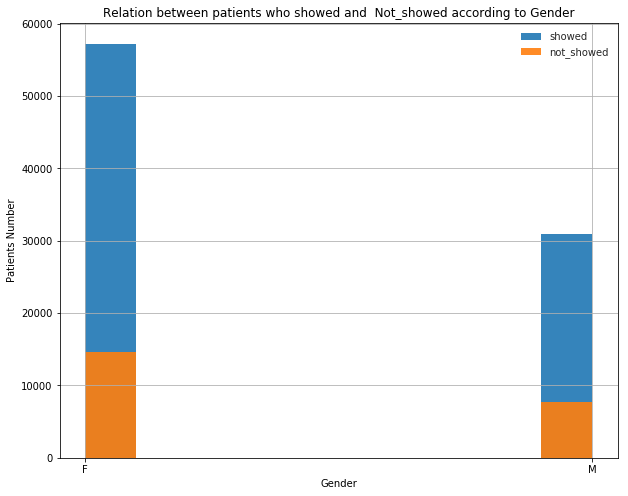

In [33]:
plt.figure(figsize=[10, 8])
df.Gender[showed].hist(alpha=0.9, label='showed')
df.Gender[not_showed].hist(alpha=0.9, label='not_showed')
plt.xlabel("Gender")
plt.ylabel("Patients Number")
plt.title("Relation between patients who showed and  Not_showed according to Gender")
sns.set_style('darkgrid')
plt.legend()

          showed  not_showed
Gender                      
F       0.796851    0.203149
M       0.800321    0.199679


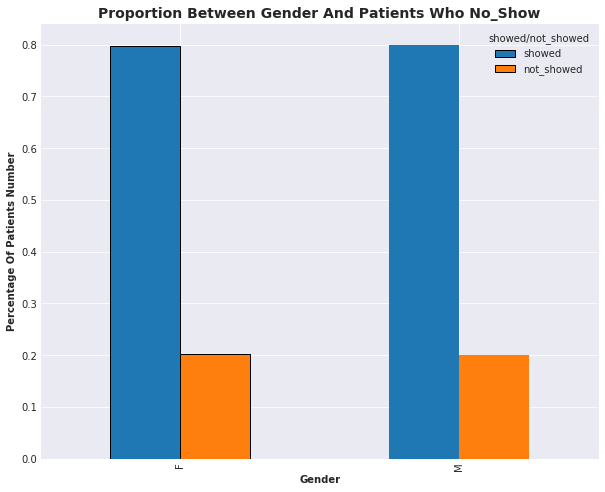

In [34]:
myplot(df,"Gender")

- Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
- Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.

• Gender is insignificant

##### D- Analysis per SMS_receiving

                showed  not_showed
SMS_received                      
False         0.832965    0.167035
True          0.724255    0.275745


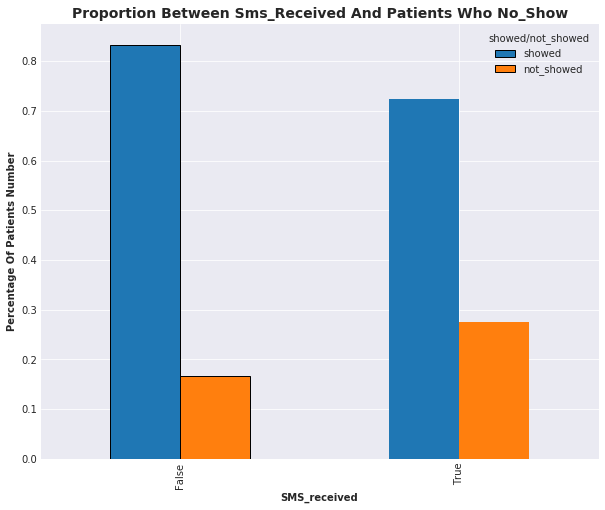

In [35]:
myplot(df,"SMS_received")

• Surprisingly, the group who received a SMS-reminder did not show up more often compared to those who did not receive a reminder. The group not having received a reminder has a much smaller proportion of No-shows.


##### E- Analysis per Age 

In [36]:
df.Age[showed].mean()

37.790504154999034

In [37]:
df.Age[not_showed].mean()

34.31766656212196

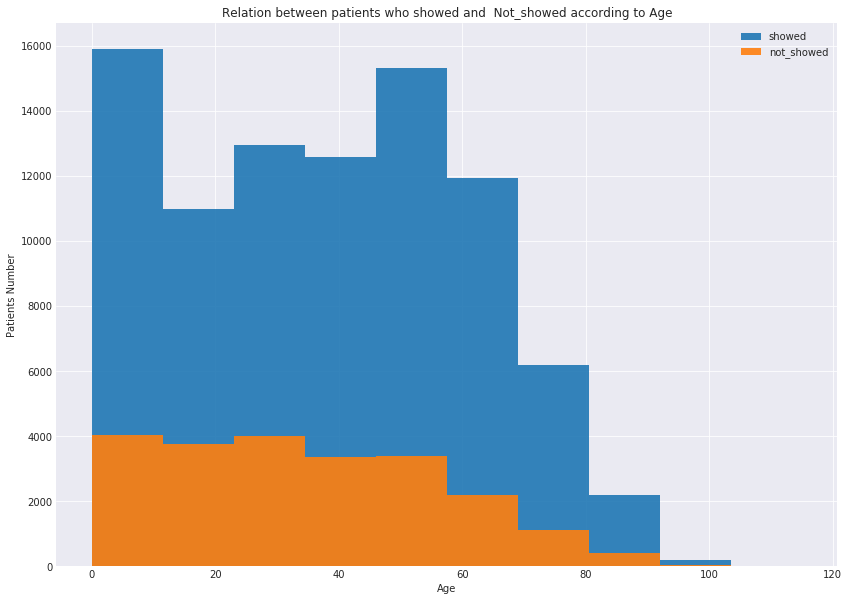

In [38]:
plt.figure(figsize=[14, 10])
df.Age[showed].hist(alpha=0.9, label='showed')
df.Age[not_showed].hist(alpha=0.9, label='not_showed')
plt.xlabel("Age")
plt.ylabel("Patients Number")
plt.title("Relation between patients who showed and  Not_showed according to Age")
sns.set_style('darkgrid')
plt.legend()

• Patients in the Age group (0-10) showed more than all other age groups.

##### F- Analysis per Neighbourhood

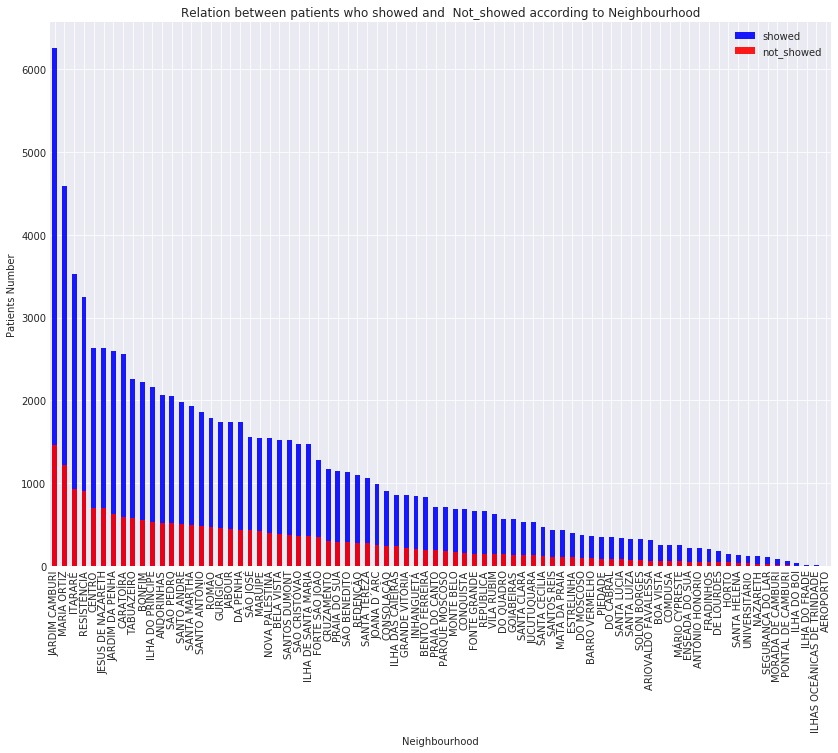

In [39]:
plt.figure(figsize=[14, 10])
df.Neighbourhood[showed].value_counts().plot(kind='bar',alpha=0.9,color='blue', label='showed')
df.Neighbourhood[not_showed].value_counts().plot(kind='bar',alpha=0.9,color='red', label='not_showed')
plt.xlabel("Neighbourhood")
plt.ylabel("Patients Number")
plt.title("Relation between patients who showed and  Not_showed according to Neighbourhood")
sns.set_style('darkgrid')
plt.legend()

It seems that Neighbourhood is strongly affecting the showing of patitents at clinics.

<a id='conclusions'></a>
## Conclusions

I have looked into the dataset and managed a few problems like unifying names, removing wrong data, adding new features based on existing data. I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (No_show). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data should be investigated further with more advanced statistical analysis to potentially reveal new insights and correlations.

###### The most important findings are:


• There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.

• The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.

• Most of the patients are not alcoholics.

• Most of the patients are not diabetes but more than alcoholics.

• There are for handicap categories with most of the people not being handicapted.

• Most patients do not have hypertension diagnosed.

• On average, 20% of appointments were missed.

• Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.

• Out of 38687 appointments made by males, 7723 were missed with the ratio of 20%.s in this area.

• For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.

• My analysis revealed that large differences in no-show proportions between the Neighbourhoods. We have seen Neighbourhoodsneighborhoods where one out of four to five appointments has a no-show.

• As we can see in our investigation the Age is the most important factor that decided if a patient would come or not. Patients in the Age group (0-10) showed more than all other age groups.

• The features such as different Gender, Scholarship is not a factor to decide if the person would come to his appointment or not!

• All diseases show very similar Show and No-show proportions, the type of the disease does not appear to have a relationship with the no-show proportions.

• Lastly, and most surprisingly is the fact that the group who received a SMS-reminder did not show up more often compared to those who did not receive a reminder. The group not having received a reminder has a much smaller proportion of No-shows.

### Limitations

The scope of this analysis is limited to the setting in which the data has been gathered. Any findings or trends cannot be induced to a larger population or to another setting. Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not. 





In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0